In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
np.random.seed(7)
# 載入資料集
df = pd.read_csv("./titanic_data.csv")

In [3]:
df = df.drop(["name", "ticket", "cabin"], axis=1)

df[["age"]] = df[["age"]].fillna(value=df[["age"]].mean())
df[["fare"]] = df[["fare"]].fillna(value=df[["fare"]].mean())
df[["embarked"]] = df[["embarked"]].fillna(value=df["embarked"].
                   value_counts().idxmax())

In [4]:
df["sex"] = df["sex"].map( {"female": 1, "male": 0} ).astype(int)
enbarked_one_hot = pd.get_dummies(df["embarked"], prefix="embarked")
df = df.drop("embarked", axis=1)
df = df.join(enbarked_one_hot)

In [5]:
df_survived = df.pop("survived") 
df["survived"] = df_survived

In [6]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

In [8]:
dataset_train = df_train.values
dataset_test = df_test.values

X_train = dataset_train[:, 0:9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, 0:9]
Y_test = dataset_test[:, 9]

X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)

In [13]:
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=18, batch_size=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
Train on 836 samples, validate on 209 samples
Epoch 1/18
836/836 [==============================] - 1s 2ms/step - loss: 0.6794 - acc: 0.6400 - val_loss: 0.6594 - val_acc: 0.6986
Epoch 2/18
836/836 [==============================] - 0s 534us/step - loss: 0.6292 - acc: 0.7225 - val_loss: 0.5869 - val_acc: 0.7129
Epoch 3/18
836/836 [==============================] - 0s 522us/step - loss: 0.5613 - acc: 0.7739

In [14]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("train = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("test = {:.2f}".format(accuracy))

train = 0.81
test = 0.80


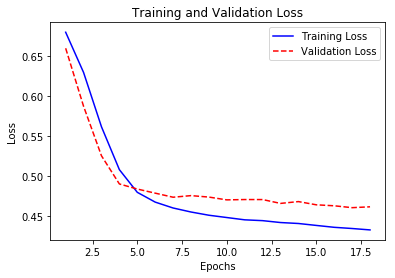

In [15]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "b-", label="Training Loss")
plt.plot(epochs, val_loss, "r--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

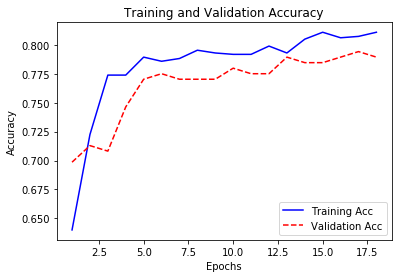

In [18]:
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
Y_pred = model.predict_classes(X_test)
print(Y_pred[:,0])
print(Y_test.astype(int))

tb = pd.crosstab(Y_test.astype(int), Y_pred[:,0],
                 rownames=["label"], colnames=["predict"])
print(tb)

[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0]
[0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0
 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 